# **Binary Class Classificaiton**

*binary classification means where model have to predict or the label column has 2 classes*

## **Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Lab/customer_churn_dataset-training-master.csv')
df


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [ ]:
df.isnull().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


## **Dataset preprocessing**

In [ ]:
drop_cols = ['CustomerID', 'Age', 'Gender']
df1 = df.drop(columns=drop_cols, axis=1)
df1

,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...
440828,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# label encode the columns which have object type data
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])
df1

,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,39.0,14.0,5.0,18.0,2,0,932.00,17.0,1.0
1,49.0,1.0,10.0,8.0,0,1,557.00,6.0,1.0
2,14.0,4.0,6.0,18.0,0,2,185.00,3.0,1.0
3,38.0,21.0,7.0,7.0,2,1,396.00,29.0,1.0
4,32.0,20.0,5.0,8.0,0,1,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...
440828,54.0,15.0,1.0,3.0,1,0,716.38,8.0,0.0
440829,8.0,13.0,1.0,20.0,1,0,745.38,2.0,0.0
440830,35.0,27.0,1.0,5.0,2,2,977.31,9.0,0.0
440831,55.0,14.0,2.0,0.0,2,2,602.55,2.0,0.0


In [ ]:
# Feature-Label split
X = df1.drop('Churn', axis=1)
y = df1['Churn']

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## **Model train & test**

In [ ]:
#Binary Class Classification

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Here using 3 models
model = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=42)
}

Model: Decision Tree
Accuracy: 0.9255730602152733
Precision: 0.9294760514479602
Recall: 0.9403840012773431
F1 Score: 0.9348982102464384

Confusion Matrix:
[[34488  3575]
 [ 2987 47117]]

Model: K-Nearest Neighbors
Accuracy: 0.9333764333594202
Precision: 0.982081353272006
Recall: 0.8991697269679068
F1 Score: 0.9387984746504408

Confusion Matrix:
[[37241   822]
 [ 5052 45052]]

Model: Random Forest
Accuracy: 0.9602118706545533
Precision: 0.9924748456920606
Recall: 0.9370908510298579
F1 Score: 0.9639880096907979

Confusion Matrix:
[[37707   356]
 [ 3152 46952]]



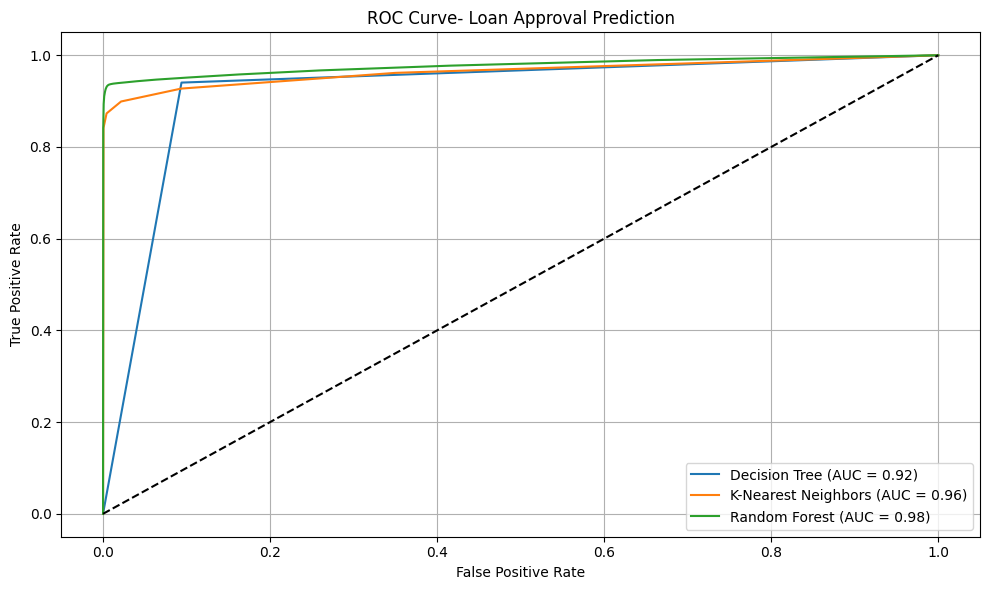

In [ ]:
# Model train and Prediction
plt.figure(figsize=(10, 6))
for name, model in model.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}\n')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# ROC curve plotting for all 3 models
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve- Loan Approval Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Multi-class Classification**

*Multi-class classification means where model have to predict or the label column has more than 2 classes*

## **Load Dataset**

In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Lab/Maternal Health Risk Data Set.csv')
dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
dataset.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [ ]:
dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


## **Dataset Preprocessing**

In [ ]:
# Split Feature-Label column
X = dataset.drop('RiskLevel', axis=1)
y = dataset['RiskLevel']

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_
class_names

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

## **Model Train & Test**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Model Define
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=31),
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=4)
}


Decision Tree Metrics:

Accuracy: 0.8177339901477833
Precision: 0.821842927264614
Recall: 0.8227230309817095
F1 Score: 0.8209753944609952

Confusion Matrix:
[[40  1  6]
 [ 5 62 13]
 [ 3  9 64]]


K-Nearest Neighbors Metrics:

Accuracy: 0.6748768472906403
Precision: 0.6966269841269842
Recall: 0.6867534527808884
F1 Score: 0.6790685422264371

Confusion Matrix:
[[37  5  5]
 [ 5 65 10]
 [ 6 35 35]]


Random Forest Metrics:

Accuracy: 0.812807881773399
Precision: 0.8210533119450957
Recall: 0.818556364315043
F1 Score: 0.8180139685184683

Confusion Matrix:
[[40  1  6]
 [ 4 61 15]
 [ 3  9 64]]



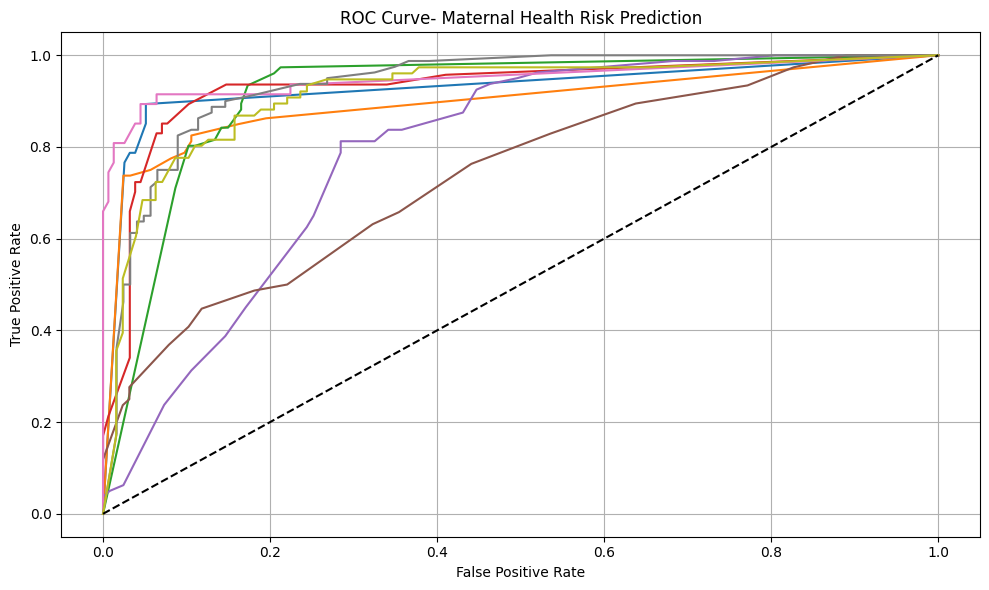

In [ ]:
# Train, Test, Evaluate
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test) # for roc-auc value we need this probability

    print(f'\n{name} Metrics:\n')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')
    print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}\n')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

    y_test_bin = label_binarize(y_test, classes=range(len(class_names)))

    for i in range(len(class_names)):
        fpr, tpr, thresholds = roc_curve(y_test_bin[:,i], y_pred_proba[:, i])
        plt.plot(fpr, tpr, label=f'{name} - {class_names[i]} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve- Maternal Health Risk Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()